In [1]:
###import importenet librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [50]:
#load the dataset
df=pd.read_csv('credit_risk.csv')

In [ ]:
### the above data set taken from KAGGELE web site

In [3]:
df.sample(4)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
8097,21,61490,RENT,5.0,EDUCATION,B,7200,10.99,0,0.12,N,3
14800,24,115000,MORTGAGE,7.0,HOMEIMPROVEMENT,A,1500,6.76,0,0.01,N,4
30103,40,46000,MORTGAGE,5.0,HOMEIMPROVEMENT,A,10000,7.90,0,0.22,N,14
14663,24,110004,MORTGAGE,8.0,EDUCATION,B,25000,12.53,0,0.23,N,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [6]:
##check the percentage of null values
df.isna().mean()*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [7]:
##from above person_emp_length is only 2.7% so we can drop NA but loan_int_rate nearlyn 
#10% we cant drop these otherwise we loss some importent data so we can impute the column by its mean

In [51]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].mean())
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

In [32]:
df.isna().mean()*100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [52]:
##check for duplicate values
df.duplicated().sum()

165

In [53]:
###drop the duplicate
df=df.drop_duplicates()

In [35]:
df.duplicated().sum()

0

In [36]:
df.sample(4)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28788,32,48000,RENT,15.0,VENTURE,A,3600,6.92,0,0.07,N,6
29278,47,38400,RENT,3.0,MEDICAL,F,22000,18.78,1,0.57,Y,17
16560,26,74000,MORTGAGE,10.0,EDUCATION,B,4475,9.99,0,0.06,N,2
10307,25,66420,MORTGAGE,1.0,MEDICAL,B,4000,12.18,0,0.06,N,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.000000,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.000000,79218.00,6000000.00
person_emp_length,32416.0,4.790488,4.088378,0.00,2.00,4.000000,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.000000,12250.00,35000.00
loan_int_rate,32416.0,11.016733,3.083040,5.42,8.49,11.011695,13.11,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.000000,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.000000,8.00,30.00


In [ ]:
### now check the outliers
###from describe function we can easily observe that person_emp_length,cb_person_cred_hist_length columns having outliers

<AxesSubplot:>

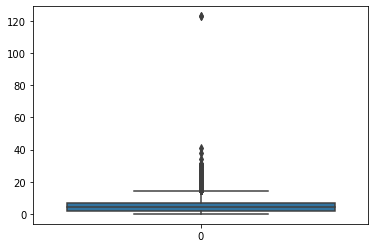

In [54]:
sns.boxplot(data=df.person_emp_length)

<AxesSubplot:>

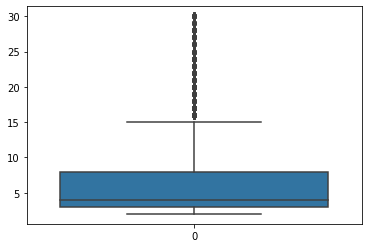

In [55]:
sns.boxplot(data=df.cb_person_cred_hist_length)

In [56]:
cols=df.columns.tolist()
cols

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [ ]:
##removing the outliers

In [66]:
df[cols]=df[df['person_emp_length']<=20.0]
df[cols]=df[df['cb_person_cred_hist_length']<=20]

<AxesSubplot:>

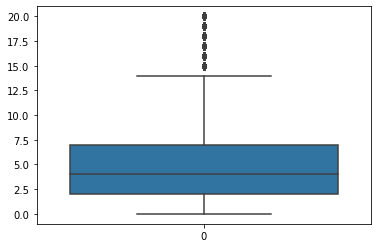

In [69]:
##now check again the outliers
sns.boxplot(data=df.person_emp_length)


<AxesSubplot:>

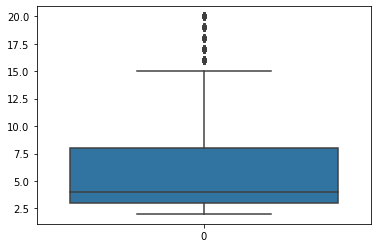

In [70]:
sns.boxplot(data=df.cb_person_cred_hist_length)

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32103.0,27.505623,5.785178,20.00,23.00,26.000000,30.00,144.00
person_income,32103.0,65644.889792,50203.441298,4000.00,38436.50,55000.000000,79000.00,2039784.00
person_emp_length,32103.0,4.723131,3.823200,0.00,2.00,4.000000,7.00,20.00
loan_amnt,32103.0,9588.160764,6316.177565,500.00,5000.00,8000.000000,12200.00,35000.00
loan_int_rate,32103.0,11.014518,3.083736,5.42,8.49,11.011695,13.11,23.22
loan_status,32103.0,0.218484,0.413224,0.00,0.00,0.000000,0.00,1.00
loan_percent_income,32103.0,0.170405,0.106802,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,32103.0,5.655827,3.712019,2.00,3.00,4.000000,8.00,20.00


In [72]:
## now convert the categorical data into numerical

cols_category=df.select_dtypes(include='object').columns.tolist()
cols_category

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [74]:
df[cols_category]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,NaN,NaN,NaN,NaN
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,NaN,NaN,NaN,NaN
32577,MORTGAGE,PERSONAL,A,N
32578,NaN,NaN,NaN,NaN
32579,NaN,NaN,NaN,NaN


In [75]:
df.isna().mean()*100

person_age                    0.965573
person_income                 0.965573
person_home_ownership         0.965573
person_emp_length             0.965573
loan_intent                   0.965573
loan_grade                    0.965573
loan_amnt                     0.965573
loan_int_rate                 0.965573
loan_status                   0.965573
loan_percent_income           0.965573
cb_person_default_on_file     0.965573
cb_person_cred_hist_length    0.965573
dtype: float64

In [76]:
df=df.dropna()

In [77]:
df.isna().mean()*100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [78]:
df[cols_category]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
5,OWN,VENTURE,A,N
...,...,...,...,...
32566,RENT,VENTURE,C,N
32573,MORTGAGE,PERSONAL,A,N
32574,RENT,PERSONAL,D,Y
32575,RENT,EDUCATION,B,N


In [88]:
for i in cols_category:
    print(df[i].value_counts())
    

RENT        16226
MORTGAGE    13242
OWN          2530
OTHER         105
Name: person_home_ownership, dtype: int64
EDUCATION            6393
MEDICAL              5985
VENTURE              5625
PERSONAL             5384
DEBTCONSOLIDATION    5152
HOMEIMPROVEMENT      3564
Name: loan_intent, dtype: int64
A    10610
B    10281
C     6384
D     3571
E      952
F      241
G       64
Name: loan_grade, dtype: int64
N    26425
Y     5678
Name: cb_person_default_on_file, dtype: int64


In [89]:
for i in cols_category:
    print(df[i].unique())
    

['OWN' 'MORTGAGE' 'RENT' 'OTHER']
['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['B' 'C' 'A' 'D' 'E' 'F' 'G']
['N' 'Y']


In [90]:
### by using one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
ohe.fit(df[cols_category])
encoded_cols=ohe.get_feature_names(cols_category).tolist()
df[encoded_cols]=ohe.transform(df[cols_category])

In [91]:
df.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
4991,24.0,37000.0,RENT,3.0,MEDICAL,E,5000.0,16.450000,1.0,0.14,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10112,22.0,56400.0,RENT,2.0,DEBTCONSOLIDATION,A,9500.0,8.900000,0.0,0.17,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21504,27.0,25200.0,RENT,3.0,MEDICAL,A,6000.0,7.900000,0.0,0.24,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
474,25.0,18000.0,MORTGAGE,1.0,MEDICAL,B,4000.0,11.011695,1.0,0.22,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6180,26.0,48000.0,MORTGAGE,1.0,VENTURE,B,4200.0,10.620000,0.0,0.09,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
for i in cols_category:
    df.drop(i,axis=1,inplace=True)

In [97]:
df.sample(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
12654,22.0,84000.0,3.0,10000.0,10.38,0.0,0.12,3.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20732,32.0,37500.0,6.0,5000.0,6.03,0.0,0.13,9.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
537,25.0,51060.0,9.0,21250.0,6.91,1.0,0.42,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21721,30.0,50000.0,4.0,6000.0,5.79,0.0,0.12,7.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22221,29.0,53500.0,3.0,5000.0,13.49,0.0,0.09,10.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [100]:
df.loan_status.value_counts()

0.0    25089
1.0     7014
Name: loan_status, dtype: int64

In [101]:
X=df.drop('loan_status',axis=1)
y=df.loan_status

In [102]:
### the dataset is imbalence so we need to balence it so we use SMOTE 
from imblearn.over_sampling import SMOTE
smt=SMOTE(k_neighbors=2,random_state=42)
X_re,y_re=smt.fit_resample(X,y)

In [103]:
y_re.value_counts()

0.0    25089
1.0    25089
Name: loan_status, dtype: int64

In [104]:
X_re.shape

(50178, 26)

In [105]:
###split the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_re,y_re,test_size=0.33,random_state=42)

In [106]:
X_train.shape,X_test.shape

((33619, 26), (16559, 26))

In [108]:
### now model build
###Logistic regression,randomForest,naviebayers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve


In [109]:
###model1 logistic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_1=lr.predict(X_test)


In [111]:
## model 1 evaluation
print(accuracy_score(y_test,y_1))

0.7321698170179358


In [112]:
print(classification_report(y_test,y_1))

              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72      8388
         1.0       0.70      0.80      0.75      8171

    accuracy                           0.73     16559
   macro avg       0.74      0.73      0.73     16559
weighted avg       0.74      0.73      0.73     16559



In [114]:
##model 2 Random forest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_2=rf.predict(X_test)

In [115]:
###model 2 evaluation
print(accuracy_score(y_test,y_2))

0.9567002838335649


In [116]:
print(classification_report(y_test,y_2))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      8388
         1.0       0.99      0.92      0.95      8171

    accuracy                           0.96     16559
   macro avg       0.96      0.96      0.96     16559
weighted avg       0.96      0.96      0.96     16559



In [117]:
### model 3 naive bayesr
nb=GaussianNB()
nb.fit(X_train,y_train)
y_3=nb.predict(X_test)

In [118]:
## model 3 evaluation
print(accuracy_score(y_test,y_3))

0.6915272661392596


In [119]:
print(classification_report(y_test,y_3))

              precision    recall  f1-score   support

         0.0       0.78      0.55      0.64      8388
         1.0       0.64      0.84      0.73      8171

    accuracy                           0.69     16559
   macro avg       0.71      0.69      0.69     16559
weighted avg       0.71      0.69      0.69     16559



In [126]:
###roc_curves
lr_prob=lr.predict_proba(X_test)
rf_prob=rf.predict_proba(X_test)
nb_prob=nb.predict_proba(X_test)
fpr1, tpr1, th1=roc_curve(y_test,lr_prob[:,1])
fpr2, tpr2, th2=roc_curve(y_test,rf_prob[:,1])
fpr3, tpr3, th3=roc_curve(y_test,nb_prob[:,1])

In [127]:
AUC_1=roc_auc_score(y_test,lr_prob[:,1])
AUC_2=roc_auc_score(y_test,rf_prob[:,1])
AUC_3=roc_auc_score(y_test,nb_prob[:,1])
print('AUC of model1: ',round((AUC_1),2))
print('AUC of model2: ',round((AUC_2),2))
print('AUC of model3: ',round((AUC_3),2))

AUC of model1:  0.81
AUC of model2:  0.98
AUC of model3:  0.78


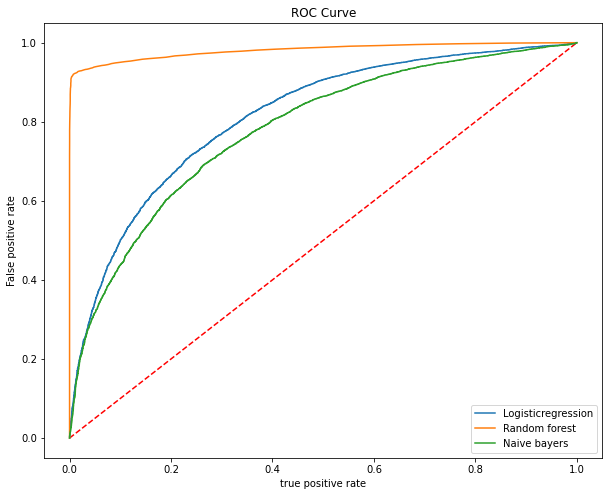

In [130]:
###ploot the auc curves
fig=plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr1, tpr1, label='Logisticregression')
plt.plot(fpr2, tpr2, label='Random forest')
plt.plot(fpr3, tpr3, label='Naive bayers')
plt.xlabel('true positive rate')
plt.ylabel('False positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
## so out of these three models Random Forest gives the best accuracy
## so we select the model for prediction

In [131]:
print('accuracy of random forest: ',accuracy_score(y_test,y_2))

accuracy of random forest:  0.9567002838335649


In [157]:
np.array(y_test[10:15])

array([1., 0., 1., 1., 1.])

In [158]:
y_2[10:15]

array([1., 0., 1., 1., 1.])

In [ ]:
## above two statementds clearly says model2 gives the correct predictions

In [ ]:
#### for these problem model2(Random_Forest)is best

In [161]:
##save the model
import pickle
pickle.dump(rf,open('Random_Forest.pkl','wb'))

In [163]:
##open the model
final_model=pickle.load(open('Random_Forest.pkl','rb'))


In [164]:
final_model.predict(X_test)

array([1., 1., 0., ..., 1., 1., 1.])

In [136]:
y_2[120]

0.0